# Support Vector Machine

### 0. 패키지 불러오기

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# 우분투 한글깨짐 현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

# 윈도우 한글깨짐 현상 해결
matplotlib.rc("font", family = "Malgun Gothic")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

### 1. 데이터 구성하기

In [2]:
df_raw = pd.read_excel("model1_dataset.xlsx")
df_raw.head()

,customer_id,insu_risk_expense,gender,age,bmi,waist,bp_min,bp_max,risk
0,C117780,194376.0,1,50,23.939481,83.0,85,130,0
1,C117780,-1869370.0,1,50,23.939481,83.0,85,130,1
2,C121178,-913949.0,1,30,24.816327,86.0,80,125,1
3,C116605,-1813374.0,1,50,26.259585,88.0,80,130,1
4,C129391,-4495124.0,2,35,19.227688,72.0,80,120,1


In [3]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)

customer_id          0
insu_risk_expense    0
gender               0
age                  0
bmi                  0
waist                0
bp_min               0
bp_max               0
risk                 0
dtype: int64

In [4]:
df_raw['gender'] = df_raw['gender'].map({1:'M', 2:'F'})
df_raw.head()

,customer_id,insu_risk_expense,gender,age,bmi,waist,bp_min,bp_max,risk
0,C117780,194376.0,M,50,23.939481,83.0,85,130,0
1,C117780,-1869370.0,M,50,23.939481,83.0,85,130,1
2,C121178,-913949.0,M,30,24.816327,86.0,80,125,1
3,C116605,-1813374.0,M,50,26.259585,88.0,80,130,1
4,C129391,-4495124.0,F,35,19.227688,72.0,80,120,1


In [5]:
df_raw = df_raw.drop(['customer_id'], axis=1, inplace=False)
df_raw_dummy = pd.get_dummies(df_raw)

In [6]:
df_raw_dummy.head()

,insu_risk_expense,age,bmi,waist,bp_min,bp_max,risk,gender_F,gender_M
0,194376.0,50,23.939481,83.0,85,130,0,0,1
1,-1869370.0,50,23.939481,83.0,85,130,1,0,1
2,-913949.0,30,24.816327,86.0,80,125,1,0,1
3,-1813374.0,50,26.259585,88.0,80,130,1,0,1
4,-4495124.0,35,19.227688,72.0,80,120,1,1,0


In [7]:
df_raw_y = df_raw_dummy['risk']
df_raw_x = df_raw_dummy.drop(['risk', 'insu_risk_expense'], axis=1, inplace=False)

In [8]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1234)

print("train data X size :{}".format(df_train_x.shape))
print("train data Y size :{}".format(df_train_y.shape))
print("test data X size :{}".format(df_test_x.shape))
print("test data Y size :{}".format(df_test_y.shape))

train data X size :(3329, 7)
train data Y size :(3329,)
test data X size :(1428, 7)
test data Y size :(1428,)


### 2. 모델 생성 - Parameter 조정 및 평가

In [11]:
v_feature_name = df_train_x.columns

scaler = StandardScaler()
df_scaled_x = scaler.fit_transform(df_raw_x)
df_scaled_x = pd.DataFrame(df_scaled_x, columns=v_feature_name)
df_scaled_x.head()

,age,bmi,waist,bp_min,bp_max,gender_F,gender_M
0,0.399823,0.333388,0.663925,1.344883,1.404923,-1.352724,1.352724
1,0.399823,0.333388,0.663925,1.344883,1.404923,-1.352724,1.352724
2,-1.640359,0.684243,1.040286,0.501717,0.828575,-1.352724,1.352724
3,0.399823,1.261738,1.291193,0.501717,1.404923,-1.352724,1.352724
4,-1.130313,-1.551955,-0.716067,0.501717,0.252227,0.739249,-0.739249


서포트 벡터 머신의 경우 피쳐의 스케일링이 꼭 필요하므로 스케일링하였다.

In [12]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_scaled_x, df_raw_y, test_size=0.3, random_state=1234)

print("train data X size :{}".format(df_train_x.shape))
print("train data Y size :{}".format(df_train_y.shape))
print("test data X size :{}".format(df_test_x.shape))
print("test data Y size :{}".format(df_test_y.shape))

train data X size :(3329, 7)
train data Y size :(3329,)
test data X size :(1428, 7)
test data Y size :(1428,)


In [13]:
svm_uncustomized = SVC(random_state=1234)
svm_uncustomized.fit(df_train_x,df_train_y)

print("Accuracy on training set:{:.3f}".format(svm_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}".format(svm_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set:0.565
Accuracy on test set:0.532


스케일링 후 모델이 이전보다 과대적합되었다.

In [14]:
svm_uncustomized

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1234, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
# C: 규제에 대한 강도

train_accuracy = []
test_accuracy=[]

para_c=[0.01 * c for c in range(1,11)]

for v_C in para_c:
    svm = SVC(C=v_C,random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))

df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.505,0.485
1,0.02,0.542,0.522
2,0.03,0.546,0.540
3,0.04,0.549,0.543
4,0.05,0.549,0.541
5,0.06,0.549,0.539
6,0.07,0.547,0.540
7,0.08,0.547,0.541
8,0.09,0.547,0.541
9,0.10,0.546,0.540


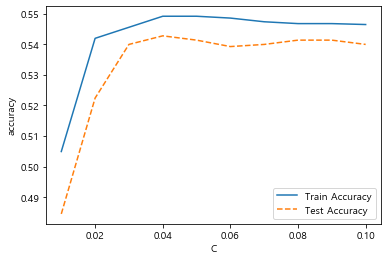

In [16]:
# 모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy,linestyle="-",label="Train Accuracy")
plt.plot(para_c, test_accuracy,linestyle="--",label="Test Accuracy")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend()

test 정확도는 이전보다 높고 train 정확도와 test 정확도의 차이가 가장 적은 0.04를 선택한다. (C=0.04)

In [19]:
# gamma: train셋이 미치는 영향의 범위

train_accuracy=[]
test_accuracy=[]

para_gamma = [gamma*0.1 for gamma in range(1,11)]

for v_gamma in para_gamma:
    svm = SVC(gamma=v_gamma, C=0.04, random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))
    

df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"]=para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["testAccuracy"] = test_accuracy

df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,testAccuracy
0,0.1,0.547,0.541
1,0.2,0.545,0.539
2,0.3,0.547,0.531
3,0.4,0.548,0.527
4,0.5,0.545,0.522
5,0.6,0.545,0.513
6,0.7,0.544,0.504
7,0.8,0.546,0.498
8,0.9,0.538,0.487
9,1.0,0.532,0.478


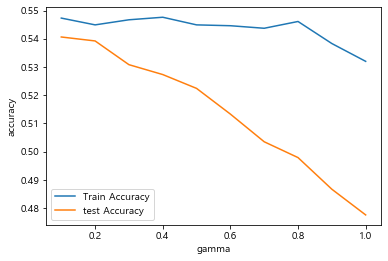

In [20]:
plt.plot(para_gamma,train_accuracy,linestyle="-",label ="Train Accuracy")
plt.plot(para_gamma,test_accuracy,linestyle="-",label ="test Accuracy")
plt.xlabel("gamma")
plt.ylabel("accuracy")
plt.legend()

gamma를 늘려도 이전 모델보다 test 정확도가 낮아지므로 gamma를 조정하지 않는다.

### 3. 최종 모델 선정

In [21]:
svc_final = SVC(C=0.04, random_state=1234)
svc_final.fit(df_train_x,df_train_y)

print("Accuracy on training set: 0.565 >>> {:.3f}".format(svc_final.score(df_train_x,df_train_y)))
print("Accuracy on test set: 0.532 >>> {:.3f}".format(svc_final.score(df_test_x,df_test_y)))

Accuracy on training set: 0.565 >>> 0.549
Accuracy on test set: 0.532 >>> 0.543


test 정확도는 이전보다 향상되었고 train 정확도와 test 정확도의 차이가 크게 줄어 과대적합이 해소되었다.

In [22]:
svc_final

SVC(C=0.04, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1234, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
y_pred = svc_final.predict(df_test_x)
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Confusion matrix:
[[378 314]
 [339 397]]


In [24]:
estimator = SVC(random_state=1234)
param_grid={"C":para_c,"gamma":para_gamma}

grid_rf=GridSearchCV(estimator,param_grid,scoring="accuracy",n_jobs=-1)
grid_rf.fit(df_train_x,df_train_y)
print("best estimator model:\n{}".format(grid_rf.best_estimator_))
print("\nbest parameter:\n{}".format(grid_rf.best_params_))
print("\nbest score:\n{}".format(grid_rf.best_score_.round(4)))

best estimator model:
SVC(C=0.08, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=1234, shrinking=True,
    tol=0.001, verbose=False)

best parameter:
{'C': 0.08, 'gamma': 0.1}

best score:
0.5434
